![](http://sympy.org/static/images/logo.png)

# SymPy

SymPy is a package for symbolic calculations in python, similar to Mathematica. It works with expressions containing symbols.

In [1]:
from sympy import *
init_printing()

Los símbolos son ladrillos básicos utilizados para construir expresiones. Cada símbolo tiene un nombre usado para imprimir expresiones. Los objetos de la clase Symboldeben crearse y asignarse a las variables de Python para ser usados ​​en expresiones. El nombre del símbolo y el nombre de la variable a la que se asigna este símbolo son dos cosas independientes, y uno puede escribir abc=Symbol('xyz'). Pero luego uno tiene que escribir abc en las expresiones de entrada, mientras SymPy que escribirá xyz en las de salida, produciendo confusión innecesaria. El nombre de la variable python debería ser el mismo que el nombre del símbolo para simplificar.

En lenguajes específicamente diseñados para cálculos simbólicos, como Mathematica, si se usa una variable a la que no se le ha asignado nada, significa automáticamente un símbolo con el mismo nombre. Python no ha sido diseñado para cálculos simbólicos. Si utiliza una variable a la que no se le ha asignado nada, recibirá un mensaje de error. Los objetos de símbolos tienen que ser creados explícitamente.

### A continuación hacemos las declaraciones para imprimir en LaTex

In [2]:
from sympy import init_printing

In [3]:
init_printing()

In [4]:
x = Symbol('x')

##### Se pueden definir varios símbolos a la vez. La cadena se divide en espacios.


#### Podemos hacer:

In [6]:
a,b,c = symbols('x,y,z')

#### Es mejor hacer:

In [7]:
x,y,z = symbols('x,y,z')

In [8]:
a = x**2-1
a

Vamos a sustituir y + 1 para x.

In [9]:
a.subs(x,y+1)

# Polinomios y funciones racionales

SymPy No expande los paréntesis automáticamente. La función expand se utiliza para esto.

In [10]:
a = (x+y-z)**6
a

In [11]:
a = expand(a)
a

Grado del polinomio  $a$ en $x$.

In [12]:
degree(a,x)

In [13]:
degree(a,y)

In [14]:
degree(a,z)

reordenemos los términos con la misma potencia de $x$.

In [15]:
collect(a,x)

Cualquier polinomio con coeficientes enteros se puede factorizar en polinomios con coeficientes enteros (que no se pueden factorizar más). Existen algoritmos eficientes para hacer esto.

In [16]:
aa = collect(a,x)
aa

In [17]:
aa = factor(aa)
aa

`SymPy` no cancela automáticamente las proporciones de polinomios por su mayor divisor común. La función `cancel` se utiliza para esto.

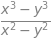

In [18]:
a = (x**3-y**3)/(x**2-y**2)
a

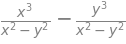

In [19]:
a1 = expand(a)
a1

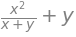

In [20]:
apart(a,y)

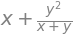

In [21]:
apart(a,x)

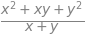

In [22]:
cancel(a)

`SymPy` no trae automáticamente sumas de expresiones racionales al denominador común. La función `together`se utiliza para esto.

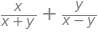

In [23]:
a=y/(x-y)+x/(x+y)
a

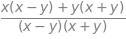

In [24]:
together(a)

La función `simplify` intenta reescribir una expresión de la forma más sencilla . Este concepto no está bien definido (diferentes formas pueden considerarse más simples en diferentes contextos), y no existe ningún algoritmo para dicha simplificación. La función `simplify` funciona heurísticamente, y no es posible adivinar de antemano que simplificaciones intentará. Es muy conveniente en sesiones interactivas para comprobar si logrará reescribir una expresión de una forma razonablemente buena. Pero no es deseable utilizarlo en programas. Allí, uno debería usar mejor las funciones más especializadas que realizan transformaciones de expresión bien definidas.

In [25]:
a = (x**3-y**3)/(x**2-y**2)

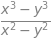

In [50]:
simplify(a)

Descomposición parcial de fracciones con respecto a $x$ .

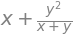

In [51]:
apart(a,x)

apart hizo las siguientes operaciones:

$$\displaystyle \frac{x^{3} - y^{3}}{x^{2} - y^{2}}= \frac{\left(x - y\right) \left(x^{2} + x y + y^{2}\right)}{(x + y)(x-y)} $$
$$ = \frac{x \left(x + y\right) + y^{2}}{x + y} $$
$$ =\displaystyle x + \frac{y^{2}}{x + y}$$

Sustituyamos algunos valores por los símbolos $x$ y $y$.

In [26]:
a=a.subs({x:1,y:2})
a

¿Y cuánto es numéricamente en punto flotante?

In [27]:
a.n(30)

## Powsimp

Esta  función reduce la expresion dada combinando potencias con similar base o exponente.

In [54]:
x, y = symbols('x y', positive=True)

a, b = symbols('a b', real=True)

In [55]:
powsimp(x**a*x**b)

In [56]:
powsimp(x**a*y**a, force=True)

In [57]:
expr=x**y*x**z*y**z 
expr

In [58]:
powsimp(expr)

In [59]:
powsimp(expr, force=True)

In [60]:
powsimp(expr, combine='base', force=True)

## Combsimp y binomial

Combinatorial expressions involving factorial and binomials can be simplified by using combsimp() function. SymPy provides a factorial() function

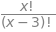

In [61]:
expr=factorial(x)/factorial(x - 3) 
expr

In [62]:
bb=combsimp(expr)
bb

In [63]:
expr=expr.subs({x:3})
expr

## Implementación del coeficiente binomial. Definición

\begin{equation}
\binom{n}{k} = \frac{n!}{k!(n-k)!}
\end{equation}


\begin{equation}
\text{or}\binom{n}{k} = \frac{(n)_k}{k!}   
\end{equation}

In [64]:
x, y = symbols('x y', positive=True)

In [65]:
binomial(x,y)   

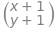

In [66]:
binomial(x+1, y+1)

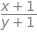

In [67]:
combsimp(binomial(x+1, y+1)/binomial(x, y))

In [68]:
binomial(8,1)

### Tríangulo de Pascal 

In [69]:
for N in range(8):
    print("N =", N,", ", [binomial(N, i) for i in range(N + 1)])
    
# N = 0, i= 0
# N = 1, i= 0, 1
# N = 2, i= 0, 1, 2 
# N = 3, i= 0, 1, 2, 3
# N = 4, i= 0, 1, 2, 3, 4
# N = 5, i= 0, 1, 2, 3, 4, 5
# N = 6, i= 0, 1, 2, 3, 4, 5, 6
# N = 7, i= 0, 1, 2, 3, 4, 5, 6, 7

N = 0 ,  [1]
N = 1 ,  [1, 1]
N = 2 ,  [1, 2, 1]
N = 3 ,  [1, 3, 3, 1]
N = 4 ,  [1, 4, 6, 4, 1]
N = 5 ,  [1, 5, 10, 10, 5, 1]
N = 6 ,  [1, 6, 15, 20, 15, 6, 1]
N = 7 ,  [1, 7, 21, 35, 35, 21, 7, 1]


http://prepa8.unam.mx/academia/colegios/matematicas/paginacolmate/applets/tsm/Applets_Geogebra/pascal.html

In [70]:
N = -2

[binomial(N, i) for i in range(1 - N)] ## i = 0, 1, 2 

In [72]:
 binomial(-2,1)

# Funciones elementales

`SymPy` Automáticamente aplica simplificaciones de funciones elementales que son correctas en todas partes.

In [73]:
sin(-x)

In [74]:
cos(pi/4),tan(5*pi/6)

`SymPy` Puede trabajar con números de punto flotante que tengan una precisión arbitrariamente alta. Aquí está $\pi$ por ejemplo por ejemplo con 150 dígitos significativos.

In [75]:
pi.n(150)

`E` Es la base de los logaritmos naturales.

In [76]:
log(1), log(E)

## Logcombine

#### Esta función toma  logaritmos y los combina usando las reglas siguientes 

#### $ log(x) + log(y) == log(x*y) $ if both are positive

#### $a*log(x) == log(x**a) $ if x is positive and a is real

In [77]:
x, y = symbols('x y', positive=True)

a, b = symbols('a b', real=True)

In [78]:
x,a=symbols('x a')

In [80]:
logcombine(a*log(x) + log(y) - log(z))

In [81]:
logcombine(a*log(x) + log(y) - log(z), force=True)

## Logaritmo en base 10

In [82]:
import sympy as sp
x = sp.Symbol('x')
f = sp.log(x, 10, evaluate=False)
print (f.subs(x, 1000))
g = sp.simplify(f)
print (g.subs(x,1000))

3
log(1000)/log(10)


In [71]:
x = sp.Symbol('x')

In [83]:
f = sp.log(x,10, evaluate=False)
print (f.subs(x, 1000))

3


In [84]:
g = sp.log(x**4,10, evaluate=False)
print (g.subs(x, 100))

8


### Evaluando funciones

In [87]:
x, y = symbols('x y', positive=True)

In [88]:
#x, y = symbols('x y')

In [89]:
exp(log(x)),log(exp(x))

In [76]:
sqrt(0)

In [77]:
sqrt(x)**4,sqrt(x**4)

Por qué no $x^2$? Tratar $x = i$.

Los símbolos pueden tener ciertas propiedades. Por ejemplo, pueden ser positivos. Entonces `SymPy` puede simplificar mejor las raíces cuadradas.

In [78]:
(sqrt(I))**4,sqrt(I**4)

In [90]:
p,q=symbols('p q',positive=True)
sqrt(p**2)

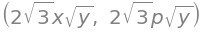

In [91]:
sqrt(12*x**2*y),sqrt(12*p**2*y)

Sea $n$ un símbolo entero e $I$ la unidad imaginaria.

In [92]:
n=Symbol('n',integer=True)
exp(2*pi*I*n)

####  El método `rewrite` intenta reescribir una expresión en términos de una función dada.

una forma común de tratar con funciones especiales es escribirlas en términos una de otra. Esto funciona para cualquier función de SymPy.

In [93]:
tan(x).rewrite(cos)

In [83]:
cos(x).rewrite(exp),exp(I*x).rewrite(cos)

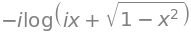

In [94]:
asin(x).rewrite(log)

#### La función `trigsimp` intenta reescribir una expresión trigonométrica en la forma más simple. En los programas es mejor utilizar funciones más especializadas.

In [95]:
trigsimp(2*sin(x)**2+3*cos(x)**2)

#### La función `expand_trig` expande senos y cosenos de sumas y múltiples ángulos.

In [96]:
expand_trig(sin(x-y)),expand_trig(sin(2*x))

 La transformación inversa, la reescritura de productos y los poderes de los senos y cosenos en expresiones lineales en estas funciones, se necesita con mayor frecuencia. Supongamos que trabajamos con una serie de Fourier truncada.

In [97]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

### Queremos cuadrar y obtener una serie de Fourier truncada de nuevo.

In [98]:
a=(a**2).rewrite(exp).expand().rewrite(cos).expand()
a

In [99]:
a.collect([cos(x),cos(2*x),cos(3*x),sin(x),sin(2*x),sin(3*x)])

#### La función `expand_log` transforma logaritmos de productos y potencias (de cantidades positivas) en sumas de logaritmos; logcombine  realiza la transformación inversa.

In [100]:
p,q=symbols('p q',positive=True)

In [101]:
a=expand_log(log(p*q**2))
a

In [102]:
logcombine(a)

#### La función `expand_power_exp`reescribe potencias cuyos exponentes son sumas a través de productos de potencias.

In [93]:
expand_power_exp(x**(p+q))

#### La función `expand_power_base` reescribe potencias cuyas bases son productos a través de productos de potencias.

In [94]:
expand_power_base((x*y)**n)

#### La función `powsimp` realiza las transformaciones inversas, del producto de potencias pasa a exponente suma  o a potencia del producto de las bases

In [95]:
powsimp(exp(x)*exp(2*y)),powsimp(x**n*y**n)

Se pueden introducir nuevas funciones simbólicas. Pueden tener un número arbitrario de argumentos.

In [103]:
f=Function('f')
f(x)+f(x,y)

### Estructura de expresión
Las expresiones internas son árboles. La función `srepr` devuelve una cadena que representa este árbol.

In [104]:
srepr(x+1)

"Add(Symbol('x', positive=True), Integer(1))"

In [105]:
srepr(x-1)

"Add(Symbol('x', positive=True), Integer(-1))"

In [106]:
srepr(x-y)

"Add(Symbol('x', positive=True), Mul(Integer(-1), Symbol('y', positive=True)))"

In [107]:
srepr(2*x*y/3)

"Mul(Rational(2, 3), Symbol('x', positive=True), Symbol('y', positive=True))"

In [108]:
srepr(x/y)

"Mul(Symbol('x', positive=True), Pow(Symbol('y', positive=True), Integer(-1)))"

Uno puede utilizar las funciones de `Add`, `Mul`, `Pow`, etc. en lugar de las operaciones binarias `+`,  `*`, `**`, etc.

In [109]:
Mul(x,Pow(y,-1))

In [110]:
srepr(f(x,y))

"Function('f')(Symbol('x', positive=True), Symbol('y', positive=True))"

#### El atributo `func` es la función de nivel superior de una expresión, y `args` es la lista de sus monumentos.

In [111]:
a = 2*x*y**2
a.func

sympy.core.mul.Mul

In [112]:
srepr(a)

"Mul(Integer(2), Symbol('x', positive=True), Pow(Symbol('y', positive=True), Integer(2)))"

In [106]:
a.args

In [113]:
for i in a.args:
    print(i)

2
x
y**2


#### La función `subs` sustituye una expresión por un símbolo.

In [114]:
a.subs(y,2)

Puede realizar sustituciones de varios símbolos. Para este fin, uno lo llama con una lista de tuplas o un diccionario.

In [115]:
a.subs([(x,pi),(y,2)])

In [116]:
a.subs({x:pi,y:2})

Puede sustituir no solo un símbolo, sino también una subexpresión, una función con argumentos.

In [111]:
a=f(x)+f(y)
a.subs(f(y),1)

In [112]:
(2*x*y*z).subs(x*y,z)

In [113]:
(x+x**2+x**2*x+x**4).subs(x**2,y)

#### Las sustituciones se realizan secuencialmente. En este caso, primero $x$  es reemplazado por $y$ produciendo $y^3+y^2$; entonces $y$ es reemplazado por $x$ en este resultado

In [117]:
a= x**2+y**3
a.subs([(x,y),(y,x)])   # primero reemplaza la x por y y después a la y por x

Intercambiar estas sustituciones conduce a un resultado diferente.

In [118]:
a.subs([(y,x),(x,y)]) # primero reemplaza la y por x y después a la x por y

#### Pero si se llama `subs` con el parámetro de palabra clave `simultaneous = True`, todas las sustituciones se realizan simultáneamente. De esta manera se puede, por ejemplo, intercambiar $x$  y  $y$. 
#### La x reemplaza a que era y en a, al mismo tiempo la y reemplaza a la que era x en a.

In [119]:
a.subs([(x,y),(y,x)],simultaneous=True)    # quedan intercambiadas respecto de a= x**2 + y**3

Una función puede ser reemplazada por otra función. Reemplaza la f por la g.

In [121]:
g = Function('g')
a = f(x)+f(y)
a.subs(f,g)

####  El método `replace` busca subexpresiones que coincidan con un patrón ( comodines) y las reemplaza por una expresión dada. Si usamos Wild en vez de Symbol  "a"  va a hacer match con cualquier argumento, excepto alguno que puediera estar excluido. 

In [122]:
f=Function('f')

Diferencia entre Wild y Symbol 

In [123]:
a = Symbol('a')
(f(x)+f(x+y)).replace(f(a),a**2)

In [124]:
a = Wild('a')
(f(x)+f(x+y)).replace(f(a),a**2)

In [125]:
(f(x,x)+f(x,y)).replace(f(a,a),a**2)

In [126]:
a=x**2+y**2
a.replace(x,x+1)

Solo un sub árbol completo puede igualar un patrón, no un subconjunto de factores en un producto o una potencia menor en uno más grande.

In [127]:
a=2*x*y*z + x*y
a.replace(x*y,z)

In [129]:
a=2*x*z*y + x*y
a.replace(z,x*y)

In [130]:
(x+x**2+x**3+x**4).replace(x**2,y)

## Resolviendo ecuaciones 

In [28]:
a,b,c,d,e,f=symbols('a b c d e f')

Como se ha mencionado anteriormente las ecuaciones no se pueden crear con el `=`

Una ecuación está representada por la función `Eq` con dos argumentos. La función `solve` devuelve una lista de soluciones.

Creamos la ecuación

In [29]:
ecuacion = Eq(x ** 2 - x, 3)
ecuacion

la resolvemos

In [32]:
solve(ecuacion)

## `solve()`

In [132]:
solve(Eq(a*x,b),x)

En lugar de ecuaciones, uno puede pasar expresiones justas a `solve`; significan ecuaciones `<expression> = 0`.

In [133]:
solve(a*x+b,x)

Una ecuación cuadrada tiene 2 soluciones.

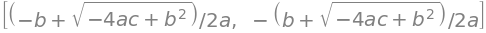

In [134]:
solve(a*x**2+b*x+c,x)

Un sistema de ecuaciones lineales.

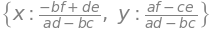

In [135]:
solve([a*x+b*y-e,c*x+d*y-f],[x,y])

## roots()

La función `roots` devuelve las raíces de un polinomio junto con sus multiplicidades.

Buscamos las raíces de:   $$ x^{3} - 3 x + 2 = 0 $$

In [364]:
roots(x**3-3*x+2,x)

La raíz x = -2 multiplicidad 1 y la raíz x = 1 multiplicidad 2 

## Pero algunas veces necesitamos resolver con símbolos,
# $$a e^{\frac{x}{t}} = C$$

Creamos los símbolos y la ecuación

In [34]:
a, x, t, C = symbols('a, x, t, C', real=True)
ecuacion = Eq(a * exp(x/t), C)
ecuacion

La resolvemos


In [35]:
solve(ecuacion ,x)

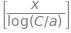

In [36]:
solve(ecuacion ,t)

Si consultamos la ayuda, vemos que las posibilidades y el número de parámetros son muchos, no vamos a entrar ahora en ellos.

#### La función `solve_poly_system` resuelve sistemas de ecuaciones polinomiales mediante la construcción de sus bases de Gröbner.

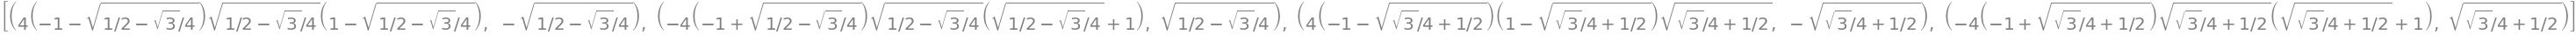

In [365]:
p1=x**2+y**2-1
p2=4*x*y-1
solve_poly_system([p1,p2],x,y)

## Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

$$y{\left (x \right )} + \frac{d}{d x} y{\left (x \right )} + \frac{d^{2}}{d x^{2}}  y{\left (x \right )} = \cos{\left (x \right )}$$

## `dsolve()`

Cambiamos el nombre y decimos que f simboliza a 'y', mientras que x simboliza a 'x' 

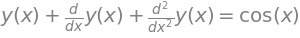

In [38]:
x = symbols('x')
f = Function('y')
ecuacion_dif = Eq(f(x).diff(x,2) + f(x).diff(x) + f(x), cos(x))
ecuacion_dif

resolvemos

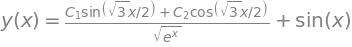

In [39]:
dsolve(ecuacion_dif, f(x))

## Series

Es más facil tratar con polinomios que con funciones arbitrarias. Es posible expandir cualquier funcion derivable como una suma de polinomios llamada Serie de Taylor. 
Los desarrollos en serie se pueden llevar a cabo con el método `.series()` o la función `series()`

### Creamos la expresión $$\displaystyle e^{x}$$

In [43]:
expr = exp(x)
expr

La desarrollamos en serie

In [44]:
series(expr)

Se puede especificar el número de términos pasándole un argumento n=....
El número que le pasemos será el primer término que desprecie.

Indicando el número de términos

In [48]:
exp(x).series(x,0,5)

In [49]:
series(expr,n=10)

Si nos molesta el $\mathcal{O}(x^{10})$ lo podemos quitar con `removeO()`:

In [50]:
series(expr, n=10).removeO()

La serie puede incluso correr sobre potencias semi enteras

In [59]:
sqrt(x*(1-x)).series(x,n=5)

Otro ejemplo

In [60]:
log(gamma(1+x)).series(x,n=6).rewrite(zeta)

### Series de funciones trigonométricas

In [439]:
cot(x).series(x,0,n=5)

Una serie puede partir de una potencia negativa.

In [440]:
tan(x).series(x,0,n=8)

Preparemos 3 series.

In [51]:
series(sin(x))

In [52]:
series(sin(x), n=8)

In [53]:
sinx=series(sin(x),x,0,8)
sinx

In [54]:
series(sin(x), n=8, x0=pi/3).removeO()

In [55]:
series(sin(x), n=8, x0=pi/3).removeO().subs(x, x-pi/3)

In [444]:
cosx=series(cos(x),x,n=8)
cosx

In [445]:
tanx=series(tan(x),x,n=8)
tanx

Los productos y las relaciones de las series no se calculan automáticamente, la función seriesdebe aplicarse a ellos.

In [446]:
series(tanx*cosx,n=8)

In [447]:
series(sinx/cosx,n=8)

Y esta serie debe ser igual a 1. Pero `sinx` como `cosx`se conocen solo con una precisión limitada, obtenemos `1` con la misma precisión.

In [448]:
series(sinx**2+cosx**2,n=8)

Aquí los términos iniciales se han cancelado, y el resultado se puede obtener solo con una precisión menor.

In [449]:
series((1-cosx)/x**2,n=6)

Centremos nuestro desarrollo en serie del `coseno` en $\pi$

In [450]:
cosx=series(cos(x),x,pi,n=8)
cosx

Las series pueden ser diferenciadas e integradas.

In [451]:
diff(sinx,x)

In [452]:
integrate(cosx,x)

Una serie (a partir de un término pequeño) puede sustituirse por una variable de expansión en otra serie. Aquí están $\sin(\tan(x))$ y $\tan(\sin(x))$.

In [454]:
st=series(sinx.subs(x,tanx),n=8)
st

In [455]:
st=series(sinx.subs(x,tanx),n=8)
st.removeO()

In [456]:
ts=series(tanx.subs(x,sinx),n=8)
ts

In [457]:
series(ts-st,n=8)

No es posible sustituir un valor numérico por la variable de expansión en una serie (y, por lo tanto, graficarla). Para este fin, primero hay que eliminar el término $\mathcal{O}$, transformando una serie en un polinomio.

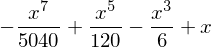

In [97]:
sinx.removeO()

## Integrales

__Usando el método `.integrate()` o la función `integrate()`__,  
integremos estas funciones:

$$\int{\cos(x)^2}dx$$
             $$\int{\frac{dx}{\sin(x)}}$$
                             $$\int{\frac{dx}{(x^2+a^2)^2}}$$



 #### Calculamos la integral de $$\int{\cos(x)^2}dx$$

In [137]:
int1 = cos(x) ** 2
int1

 #### Con Integral queda expresada la integral de la funcion 

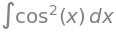

In [138]:
Integral(int1)  

Integrate la resuelve

In [139]:
integrate(int1)

Y obtenemos  $$\displaystyle \frac{x}{2} + \frac{\sin{\left(x \right)} \cos{\left(x \right)}}{2}$$

#### Calculamos la integral de  $$\int{\frac{dx}{\sin(x)}}$$

In [140]:
int2 =  1 / sin(x)
int2

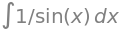

In [141]:
Integral(int2)

In [142]:
integrate(int2)

$$\displaystyle \frac{\log{\left(\cos{\left(x \right)} - 1 \right)}}{2} - \frac{\log{\left(\cos{\left(x \right)} + 1 \right)}}{2}$$

Calculamos la integral de $$\int{\frac{dx}{(x^2+a^2)^2}}$$

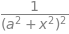

In [143]:
x, a = symbols('x, a', real=True)

int3 = 1 / (x**2 + a**2)**2
int3

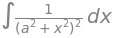

In [144]:
Integral(int3,x)

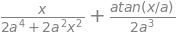

In [145]:
integrate(int3, x)

El resultado es $$\displaystyle \frac{x}{2 a^{4} + 2 a^{2} x^{2}} + \frac{\operatorname{atan}{\left(\frac{x}{a} \right)}}{2 a^{3}}$$

Resolver:  $$\int \frac{1}{x \left(x^{2} - 2\right)^{2}}\, dx$$

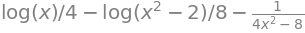

In [146]:
integrate(1/(x*(x**2-2)**2),x)

Resolver: $$ \int \frac{1}{e^{x} + 1}\, dx $$

In [147]:
integrate(1/(exp(x)+1),x)

Resolver: $$ \int \log{\left(x \right)}\, dx $$

In [148]:
integrate(log(x),x)

Resolver:  $$ \int x \sin{\left(x \right)}\, dx $$

In [109]:
integrate(x*sin(x),x)

Resolver:       $$  \int x e^{- x^{2}}\, dx $$    

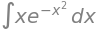

In [174]:
a= Integral(x*exp(-x**2),x)
a

In [157]:
integrate(x*exp(-x**2),x)

### Queremos calcular la integral de $$ x^{x}\ $$

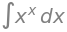

In [149]:
a=Integral(x**x,x)
a

In [150]:
print(a)

Integral(x**x, x)


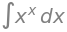

In [151]:
integrate(x**x,x)

 no lo resuelve 

 ### Escribiendo ahora $$\int{x^n}dx$$

In [152]:
h=integrate(x**n,x)
h

⎧ n + 1            
⎪x                 
⎪──────  for n ≠ -1
⎨n + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [153]:
h.doit()

⎧ n + 1            
⎪x                 
⎪──────  for n ≠ -1
⎨n + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

Nos da con la salida latex  $$\begin{cases} \frac{x^{n + 1}}{n + 1} & \text{for}\: n \neq -1 \\\log{\left(x \right)} & \text{otherwise} \end{cases}$$

#### Calculamos otra integral 

$$\displaystyle \int \frac{\left(x^{4} + x^{2} e^{x} - x^{2} - 2 x e^{x} - 2 x - e^{x}\right) e^{x}}{\left(x - 1\right)^{2} \left(x + 1\right)^{2} \left(e^{x} + 1\right)}\, dx$$

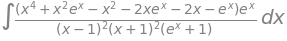

In [154]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x -exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

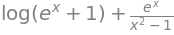

In [155]:
integ.doit()

El resultado en latex $$\displaystyle \log{\left(e^{x} + 1 \right)} + \frac{e^{x}}{x^{2} - 1}$$

Ahora calculamos  $$\displaystyle \int \sin{\left(x^{2} \right)}\, dx $$

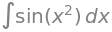

In [332]:
integ = Integral(sin(x**2), x)
integ

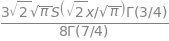

In [336]:
integ.doit()

Esta es una integral sin evaluar.

Resolvemos:        $$\displaystyle \int \sin{\left(x \right)}\, dx = - \cos{\left(x \right)}  $$

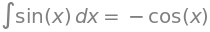

In [338]:
a=Integral(sin(x),x)
Eq(a,a.doit()) 

In [339]:
a.doit()

Podemos computar integrales definidas

$$\int_0^\infty e^{-x}\,dx,$$

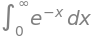

In [156]:
Integral(exp(-x), (x, 0, oo))

In [157]:
integrate(exp(-x), (x, 0, oo))

$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy,$$

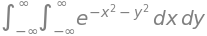

In [158]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [159]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

#### _ Esto ha sido un recorrido simple por algunas de las posibilidades que ofrece SymPy.
El cálculo simbólico es un terreno díficil y este paquete avanza a pasos agigantados gracias a un grupo de desarrolladores siempre dispuestos a mejorar y escuchar sugerencias.
Sus posibilidades no acaban aquí.